### We're going to cover the basic of interacting with a webpage


#### Table Parser Code

Run the table parser code before continuing with the lesson


In [14]:
import mechanize


In [15]:
#import the html parser that constructs of tree of tags and what's in them
import lxml.html as ET

#Let's make a function that reads tables and gets the useful information
#content_string is the source code for the page
#table_number is which table we should parse if there are multiple tables on the page. 
#The default value for table_number is 0, meaning retreive the first table
def table_reader(source_code,table_number=0):
    
    #send the page html to the html parser
    doc = ET.fromstring(source_code)
    
    #make an empty list to save our table into
    data=[]
    
    #look in between the tags that say "table" and find all of the row elements, which are the <tr> tags 
    #the table indicates, which table on the page to retreive in case there are many
    rows = doc.xpath("//table")[table_number].findall("tr")
    
    #go through the list of table rows    
    for row in rows:
        #append to our data all of the data in the cells of the row
        data.append([c.text_content() for c in row.getchildren()])
    
    #return the data list
    return data

#### Interacting with Websites Automatically

Sometimes, the data we need is within a site that doesn't have a url.

Rather, we first have to interact with form, select the necessary information, and submit it by pressing a button.

Look at this website, for example:
http://www.chicagoelections.com/en/election3.asp

Try to access the Mayoral Results for the 2015 Municipal Elections.

After you access the results, try to get back to the results page directly without going through the form process.


#### Automating the web browsing process with Mechanize

We can use the mechanize library to emulate a browser, and interact with websites in an automated way.

Make sure you have mechanize installed. If you do not, go to your commandline terminal and enter: pip install mechanize.

#### Creating the browser in Python

We''ll first import the mechanize library

Then, we'll create an object called br that is our browser.

This object can interact with webpage, and perform the commands we give it

In [16]:
import mechanize

#start the mechanize browser
br = mechanize.Browser()

#### How to make the automated browser look more convincing to websites

We have to tell the br object to ignore text files that some websites have called "robots.txt"

These two lines bypass robot resriction and have our broswer able to pretend that is is a real browser

In [17]:
#some websites have a txt file that say not to use a bot
#the next lines tells mechanize to ignore it
br.set_handle_robots(False)
br.set_handle_equiv(False) 

#tell the mechanize browser to pretend it's a real Firefox Browser by setting the header information that is passed when a browser makes a request
br.addheaders = [('User-agent', 'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.1) Gecko/2008071615 Fedora/3.0.1-1.fc9 Firefox/3.0.1')]

#### Accessing a website through an automated browser

Now, we are ready to accessing websites

We will tell our browser to open the website

We can have have it print out the url it is on to verify

In [18]:
#Have the mechanize browser open the webpage
br.open("http://www.chicagoelections.com/en/election3.asp")

#Print out the url
br.geturl()

'http://www.chicagoelections.com/en/election3.asp'

#### Interacting with forms and buttons on websites

Because we are on the website, we can access the form.

In mechanize, we can tell our browser to select a form by its name

To know the name to pass on, we have to go to the website ourselves and see the name of the form in the page source.

The name of the form is "form1"

We create a form variable that holds the form and shows us our available elements to interact with

In [19]:
#There is a form whose name "form1" 
#Tell the browser to select it
br.select_form(name="form1")
form = br.form
print form

<form1 POST http://www.chicagoelections.com/en/election3.asp application/x-www-form-urlencoded
  <HiddenControl(VTI-GROUP=0) (readonly)>
  <SelectControl(D3=[*, 2016 Primary - DEM - 3/15/16                      , 2016 Primary - REP - 3/15/16                      , 2016 Primary - GRN - 3/15/16                      , 2016 Primary - Non-Partisan - 3/15/16             , 2015 Municipal Runoffs - 4/7/15                   , 2015 Municipal General - 2/24/15                  , 2014 General Election - 11/4/14                   , 2014 Primary - DEM - 3/18/14                      , 2014 Primary - REP - 3/18/14                      , 2014 Primary - GRN - 3/18/14                      , 2014 Primary - Non-Partisan - 3/18/14             , 2013 Special Election - 2nd Cong - 4/9/13         , 2013 Special Primary - 2nd Cong - D - 2/26/13     , 2013 Special Primary - 2nd Cong - R - 2/26/13     , 2012 General Election - 11/6/2012                 , 2012 Primary - DEM - 3/20/12                      , 2012 Pr

#### Selecting an item from a drop-down menu

Let's interact with the drop-down menu by selecting on of its elements and setting its value

In [20]:
#There is an dropdown menu called "D3". It's gives list of options of results.
#Set the value to be the Municipal General Elections Value
form['D3'] = ["2015 Municipal General - 2/24/15                  "]


#### Submitting the form
We can tell the broswer to submit the form, which should take us to the next page

In [21]:
#Submit the form and be taken to the next page, which asks what information from the elections do you want
response = br.submit()

#print out the url to show it's a new page
br.geturl()

'http://www.chicagoelections.com/en/wdlevel3.asp?elec_code=10'

#### Repeating the process on the next page
This new page has another form on it.

The form wants us to select, which results we want from the election we selected in the first form.

We'll select the mayor option this time

In [22]:
br.select_form(name="form1")
form = br.form
form['D3'] = ["Mayor"]

#### Submitting the second form

We'll submit this form, and be taken to the page that contains the table we want

In [23]:
response = br.submit()
br.geturl()

'http://www.chicagoelections.com/en/wdlevel3.asp?elec_code=10'

#### Extracting the table information
The last step is to get the page source code and pass it on to our table reader function

The table reader function will return a list of lists that we'll call "tabledata"

In [24]:
content_string = response.read().encode("utf-8")
tabledata = table_reader(content_string)

print tabledata

[['2015 Municipal General - 2/24/15 -- Mayor'], ['Click on the ward located on the left side of the page to see results at the precinct level'], ['Ward', 'Votes Cast', 'RAHM EMANUEL ', '%', 'WILLIE WILSON ', '%', 'ROBERT W. FIORETTI ', '%', "JESUS ''CHUY'' GARCIA ", '%', 'WILLIAM WALLS, III ', '%'], ['1', ' 8458', '3349', ' 39.60%', '260', ' 3.07%', '618', ' 7.31%', '4128', ' 48.81%', '103', ' 1.22%'], ['2', ' 10434', '6727', ' 64.47%', '331', ' 3.17%', '863', ' 8.27%', '2428', ' 23.27%', '85', ' 0.81%'], ['3', ' 10645', '5223', ' 49.07%', '1768', ' 16.61%', '954', ' 8.96%', '2211', ' 20.77%', '489', ' 4.59%'], ['4', ' 11958', '5329', ' 44.56%', '1703', ' 14.24%', '942', ' 7.88%', '3396', ' 28.40%', '588', ' 4.92%'], ['5', ' 11563', '5088', ' 44.00%', '1494', ' 12.92%', '533', ' 4.61%', '3890', ' 33.64%', '558', ' 4.83%'], ['6', ' 11033', '4703', ' 42.63%', '2569', ' 23.28%', '519', ' 4.70%', '2525', ' 22.89%', '717', ' 6.50%'], ['7', ' 10718', '4690', ' 43.76%', '2294', ' 21.40%', '43

#### Saving the results in a dataframe

We'll cutoff some unnecessary rows from the tabledata object and make a pandas DataFrame from it

In [46]:
#remove unecessary title headers, which occur in the first two rows and last 3 rows
#we just want the information in between (column headers, and data)
data_no_title = tabledata[2:-4]

import pandas as pd
mayorvotes_df = pd.DataFrame(data_no_title[1:],columns=data_no_title[0])

mayorvotes_df.head(10)


,Ward,Votes Cast,Barack Obama & Joe Biden,%,Mitt Romney & Paul Ryan,%,Gary Johnson & James P. Gray,%,Jill Stein & Howie Hawkins,%
0,1,20672,17167,83.04%,2777,13.43%,338,1.64%,390,1.89%
1,2,26583,18179,68.39%,7814,29.39%,391,1.47%,199,0.75%
2,3,24791,22343,90.13%,2245,9.06%,123,0.50%,80,0.32%
3,4,25530,23910,93.65%,1353,5.30%,146,0.57%,121,0.47%
4,5,23815,22717,95.39%,792,3.33%,107,0.45%,199,0.84%
5,6,25377,25198,99.29%,137,0.54%,18,0.07%,24,0.09%
6,7,24174,23840,98.62%,274,1.13%,40,0.17%,20,0.08%
7,8,28602,28355,99.14%,191,0.67%,29,0.10%,27,0.09%
8,9,26880,26620,99.03%,208,0.77%,24,0.09%,28,0.10%
9,10,14716,12009,81.61%,2585,17.57%,70,0.48%,52,0.35%


#### Try it yourself

Imagine as a researcher your were interested in seeing how the mayoral preferences of a Ward relate to how Democratic/Republican a Ward is.

Write code that accesses the data from the <U> 2012 General Election </U> and create a DataFrame that contains the data table for how many and what percentage of people in each Ward voted for each presidential candidate.

<U> Merge the presidential voting dataframe with the data frame we have for mayoral results </U>. Remember the syntax for merging two dataframes is: merge(dataframe1, dataframe2, on=keycolumn)
For the merge function, you provide the names of the two dataframe, and the column name that serves as your key for letting the merge function know how to line up the dataframes so everything matches.

The end result of your script should be a single pandas dataframe with the presidential results and mayoral results for each ward.







In [48]:
import mechanize

#start the mechanize browser
br = mechanize.Browser()

#some websites have a txt file that say not to use a bot
#the next lines tells mechanize to ignore it
br.set_handle_robots(False)
br.set_handle_equiv(False) 

#tell the mechanize browser to pretend it's a real Firefox Browser by setting the header information that is passed when a browser makes a request
br.addheaders = [('User-agent', 'Mozilla/5.0 (X11; U; Linux i686; en-US; rv:1.9.0.1) Gecko/2008071615 Fedora/3.0.1-1.fc9 Firefox/3.0.1')]

#Have the mechanize browser open the webpage
br.open("http://www.chicagoelections.com/en/election3.asp")

#There is a form whose name "form1" 
#Tell the browser to select it
br.select_form(name="form1")
form = br.form


In [49]:
#There is an dropdown menu called "D3". It's gives list of options of results.
#Set the value to be the Municipal General Elections Value
form['D3'] = ["2012 General Election - 11/6/2012                 "]

In [50]:
#Submit the form and be taken to the next page, which asks what information from the elections do you want
response = br.submit()

#print out the url to show it's a new page
br.geturl()

'http://www.chicagoelections.com/en/wdlevel3.asp?elec_code=19'

In [51]:
br.select_form(name="form1")
form = br.form
form['D3'] = ["President & Vice President, U.S."]

In [52]:
response = br.submit()
br.geturl()

'http://www.chicagoelections.com/en/wdlevel3.asp?elec_code=19'

In [53]:
content_string = response.read().encode("utf-8")
tabledata = table_reader(content_string)



In [54]:
#remove unecessary title headers, which occur in the first two rows and last 3 rows
#we just want the information in between (column headers, and data)
data_no_title = tabledata[2:-4]

import pandas as pd
presidentialvotes_df = pd.DataFrame(data_no_title[1:],columns=data_no_title[0])

presidentialvotes_df.head(10)

,Ward,Votes Cast,Barack Obama & Joe Biden,%,Mitt Romney & Paul Ryan,%,Gary Johnson & James P. Gray,%,Jill Stein & Howie Hawkins,%
0,1,20672,17167,83.04%,2777,13.43%,338,1.64%,390,1.89%
1,2,26583,18179,68.39%,7814,29.39%,391,1.47%,199,0.75%
2,3,24791,22343,90.13%,2245,9.06%,123,0.50%,80,0.32%
3,4,25530,23910,93.65%,1353,5.30%,146,0.57%,121,0.47%
4,5,23815,22717,95.39%,792,3.33%,107,0.45%,199,0.84%
5,6,25377,25198,99.29%,137,0.54%,18,0.07%,24,0.09%
6,7,24174,23840,98.62%,274,1.13%,40,0.17%,20,0.08%
7,8,28602,28355,99.14%,191,0.67%,29,0.10%,27,0.09%
8,9,26880,26620,99.03%,208,0.77%,24,0.09%,28,0.10%
9,10,14716,12009,81.61%,2585,17.57%,70,0.48%,52,0.35%


In [55]:
df_merged = presidentialvotes_df.merge(mayorvotes_df, left_on="Ward", right_on="Ward")
df_merged

,Ward,Votes Cast_x,Barack Obama & Joe Biden _x,%_x,Mitt Romney & Paul Ryan _x,%_x,Gary Johnson & James P. Gray _x,%_x,Jill Stein & Howie Hawkins _x,%_x,Votes Cast_y,Barack Obama & Joe Biden _y,%_y,Mitt Romney & Paul Ryan _y,%_y,Gary Johnson & James P. Gray _y,%_y,Jill Stein & Howie Hawkins _y,%_y
0,1,20672,17167,83.04%,2777,13.43%,338,1.64%,390,1.89%,20672,17167,83.04%,2777,13.43%,338,1.64%,390,1.89%
1,2,26583,18179,68.39%,7814,29.39%,391,1.47%,199,0.75%,26583,18179,68.39%,7814,29.39%,391,1.47%,199,0.75%
2,3,24791,22343,90.13%,2245,9.06%,123,0.50%,80,0.32%,24791,22343,90.13%,2245,9.06%,123,0.50%,80,0.32%
3,4,25530,23910,93.65%,1353,5.30%,146,0.57%,121,0.47%,25530,23910,93.65%,1353,5.30%,146,0.57%,121,0.47%
4,5,23815,22717,95.39%,792,3.33%,107,0.45%,199,0.84%,23815,22717,95.39%,792,3.33%,107,0.45%,199,0.84%
5,6,25377,25198,99.29%,137,0.54%,18,0.07%,24,0.09%,25377,25198,99.29%,137,0.54%,18,0.07%,24,0.09%
6,7,24174,23840,98.62%,274,1.13%,40,0.17%,20,0.08%,24174,23840,98.62%,274,1.13%,40,0.17%,20,0.08%
7,8,28602,28355,99.14%,191,0.67%,29,0.10%,27,0.09%,28602,28355,99.14%,191,0.67%,29,0.10%,27,0.09%
8,9,26880,26620,99.03%,208,0.77%,24,0.09%,28,0.10%,26880,26620,99.03%,208,0.77%,24,0.09%,28,0.10%
9,10,14716,12009,81.61%,2585,17.57%,70,0.48%,52,0.35%,14716,12009,81.61%,2585,17.57%,70,0.48%,52,0.35%


AttributeError: 'Series' object has no attribute 'find'

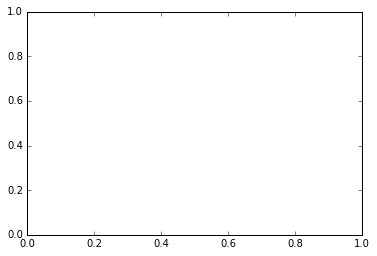

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline


#plot a scatterplot of the data
#the x-axis (bottom of the plot) is the hypothesized predictor variable (Temperature)
#The y-axis (left of the plot) is the outcome variable of interest (Closing Price)
# The "o" indicates that we want data represented as circles, not X's or lines
plt.plot(df_merged['Ward'], df_merged['Votes Cast_x'])

#show the figure
plt.show()